In [ ]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", 20)
pd.set_option("display.precision", 4)
pd.set_option("plotting.backend", "matplotlib")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. EDA

В датасете собраны [данные о жилой недвижимости в регионах России в 2021 г.](https://www.kaggle.com/datasets/mrdaniilak/russia-real-estate-2021)

Структура данных  
date - дата внесения записи о характеристиках помещения  
price - цена  
level - этаж помещения  
levels - число этажей в здании  
rooms - число комнат в помещении (метка "-1" присвоена квартирам-студиям)  
area - площадь квартиры  
kitchen_area - площадь кухни  
geo_lat - координата широты расположения объекта  
geo_lon - координата долготы расположения объекта  
building_type - тип фасада здания: 0 - Don't know. 1 - Other. 2 - Panel. 3 - Monolithic. 4 - Brick. 5 - Blocky. 6 - Wooden  
object_type - первичка ('0') или вторичка ('2')  
postal_code - почтовый индекс  
street_id - иденитфикатор улицы
id_region - код региона  
house_id - идентификатор здания

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Russia Real Estate 2021.csv', delimiter=';')

In [ ]:
df = pd.DataFrame(df[:113500])  # для удобства работы возьмём лишь 113 тыс. строк из более чем 11 млн
df.head(5)

,date,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,postal_code,street_id,id_region,house_id
0,2021-01-01,2451300,15,31,1,30.3,0.0,56.7801,60.6994,0,2,620000.0,NaN,66,1632918.0
1,2021-01-01,1450000,5,5,1,33.0,6.0,44.6082,40.1384,0,0,385000.0,NaN,1,NaN
2,2021-01-01,10700000,4,13,3,85.0,12.0,55.5401,37.7251,3,0,142701.0,242543.0,50,681306.0
3,2021-01-01,3100000,3,5,3,82.0,9.0,44.6082,40.1384,0,0,385000.0,NaN,1,NaN
4,2021-01-01,2500000,2,3,1,30.0,9.0,44.7387,37.7137,3,2,353960.0,439378.0,23,1730985.0


In [ ]:
df.shape

(113500, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113500 entries, 0 to 113499
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   date           113500 non-null  object 
 1   price          113500 non-null  int64  
 2   level          113500 non-null  int64  
 3   levels         113500 non-null  int64  
 4   rooms          113500 non-null  int64  
 5   area           113500 non-null  float64
 6   kitchen_area   113500 non-null  float64
 7   geo_lat        113500 non-null  float64
 8   geo_lon        113500 non-null  float64
 9   building_type  113500 non-null  int64  
 10  object_type    113500 non-null  int64  
 11  postal_code    107737 non-null  float64
 12  street_id      74809 non-null   float64
 13  id_region      113500 non-null  int64  
 14  house_id       85701 non-null   float64
dtypes: float64(7), int64(7), object(1)
memory usage: 13.0+ MB


В формате 'object' только признак date, однако категориальными по своей сущности являются признаки: building_type, object_type.

Отдельно обозначу признаки-идентификаторы: street_id, id_region, house_id, postal_code.


In [ ]:
df.describe(include='all')

,date,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,postal_code,street_id,id_region,house_id
count,113500,1.1350e+05,113500.0000,113500.0000,113500.0000,113500.0000,113500.0000,113500.0000,113500.0000,113500.0000,113500.0000,107737.0000,74809.000,113500.0000,8.5701e+04
unique,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2021-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,13950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.1419e+07,6.2611,11.2802,1.7813,54.3369,-7.2463,54.2694,52.3949,1.9264,0.5199,399418.1995,353218.643,50.6155,1.7106e+06
std,NaN,1.8867e+09,5.3447,7.2742,1.1747,27.8568,38.5607,4.6719,22.4118,1.7240,0.8772,195119.7441,137087.393,23.0360,6.4184e+05
min,NaN,1.0000e+00,0.0000,0.0000,-1.0000,2.0000,-100.0000,42.0241,19.9031,0.0000,0.0000,0.0000,116221.000,1.0000,5.8861e+05
25%,NaN,2.2000e+06,2.0000,5.0000,1.0000,37.0000,0.0000,52.7319,37.6185,0.0000,0.0000,196084.0000,232957.000,29.0000,1.1763e+06
50%,NaN,3.3900e+06,5.0000,9.0000,2.0000,48.0000,6.7000,55.5757,42.7032,2.0000,0.0000,398036.0000,351003.000,54.0000,1.7031e+06
75%,NaN,5.6000e+06,9.0000,16.0000,3.0000,64.3000,11.0000,56.8200,61.4387,4.0000,2.0000,624981.0000,471630.000,72.0000,2.2681e+06


### 1.1. Очистка данных и заполнения пропусков

In [ ]:
df.duplicated().sum() # поиск дубликатов

1240

In [ ]:
DF = df.drop_duplicates() # Складываем в новый датафрейм результат удаления дубликатов

DF = DF.reset_index(drop=True) # обновим индексы в датафрейме DF. если бы мы прописали drop = False, то была бы еще одна колонка - старые индексы

In [ ]:
#Вычисляем процент пропусков
for i in DF.columns:
    per_na = DF[DF[i].isna()].shape[0] / DF.shape[0] * 100
    print(f'Процент пропуска значений признака {i} -', per_na)

Процент пропуска значений признака date - 0.0
Процент пропуска значений признака price - 0.0
Процент пропуска значений признака level - 0.0
Процент пропуска значений признака levels - 0.0
Процент пропуска значений признака rooms - 0.0
Процент пропуска значений признака area - 0.0
Процент пропуска значений признака kitchen_area - 0.0
Процент пропуска значений признака geo_lat - 0.0
Процент пропуска значений признака geo_lon - 0.0
Процент пропуска значений признака building_type - 0.0
Процент пропуска значений признака object_type - 0.0
Процент пропуска значений признака postal_code - 5.102440762515589
Процент пропуска значений признака street_id - 34.15553180117584
Процент пропуска значений признака id_region - 0.0
Процент пропуска значений признака house_id - 24.504721182968108


Обращу внимание на значение kitchen_area = -100.00  
Как пояснял автор датасета - за этим значением скрывается NaN

In [ ]:
DF[(DF['kitchen_area']==-100)]

,date,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,postal_code,street_id,id_region,house_id
13,2021-01-01,3750000,19,20,2,40.0,-100.0,55.0553,82.8942,3,0,630082.0,557992.0,54,2715855.0
26,2021-01-01,2700000,5,5,3,64.0,-100.0,50.5365,137.0291,4,0,681000.0,317006.0,27,2279129.0
30,2021-01-01,900000,3,4,3,54.0,-100.0,51.9115,102.4356,4,0,671023.0,153245.0,3,632956.0
41,2021-01-01,4200000,1,14,2,50.0,-100.0,43.5822,39.7273,3,0,354000.0,151411.0,23,1278090.0
63,2021-01-01,4200000,12,25,-1,25.8,-100.0,60.0369,30.2261,3,2,190000.0,291085.0,78,2484205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112223,2021-01-11,6700000,8,9,3,98.4,-100.0,44.0425,42.8604,4,0,357601.0,484224.0,26,2754739.0
112231,2021-01-11,2000000,3,5,2,43.5,-100.0,55.3487,86.0691,4,0,650025.0,395240.0,42,2593846.0
112244,2021-01-11,930000,1,5,1,32.0,-100.0,50.0902,45.3640,2,0,403876.0,567217.0,34,1124691.0
112246,2021-01-11,750000,3,5,1,19.0,-100.0,53.8389,87.1785,5,0,654038.0,279896.0,42,2127332.0


In [ ]:
DF.loc[DF['kitchen_area']==-100, ['kitchen_area']] = np.NaN

Теперь стоит снова проверить процент пропущенных значений в столбцах.  
Как мы видим, таких значений более 14% от выборки признака

In [ ]:
for i in DF.columns:
    per_na = DF[DF[i].isna()].shape[0] / DF.shape[0] * 100
    print(f'Процент пропуска значений признака {i} -', per_na)

Процент пропуска значений признака date - 0.0
Процент пропуска значений признака price - 0.0
Процент пропуска значений признака level - 0.0
Процент пропуска значений признака levels - 0.0
Процент пропуска значений признака rooms - 0.0
Процент пропуска значений признака area - 0.0
Процент пропуска значений признака kitchen_area - 14.470871191876004
Процент пропуска значений признака geo_lat - 0.0
Процент пропуска значений признака geo_lon - 0.0
Процент пропуска значений признака building_type - 0.0
Процент пропуска значений признака object_type - 0.0
Процент пропуска значений признака postal_code - 5.102440762515589
Процент пропуска значений признака street_id - 34.15553180117584
Процент пропуска значений признака id_region - 0.0
Процент пропуска значений признака house_id - 24.504721182968108


Для заполнения пропусков в kitchen_area вычислим среднее значение площади кухни по количеству комнат в квартире

In [ ]:
mean_area_by_rooms= DF.groupby('rooms')['kitchen_area'].mean()

In [ ]:
mean_area_by_rooms.head(10)

rooms
-1     2.4641
 1     7.7751
 2     8.3158
 3     9.8529
 4    11.6593
 5    14.8101
 6    20.1682
 7    15.1125
 8    22.8364
 9    15.1500
Name: kitchen_area, dtype: float64

In [ ]:
for index, row in DF.iterrows(): # Заполняем NaN из признака kitchen_area средним
    if pd.isnull(row['kitchen_area']):
        DF.at[index, 'kitchen_area'] = mean_area_by_rooms[row['rooms']]

Дальнейший анализ показал, что в распределении данных есть правосторонняя асимметрия - для такого вида распределения подойдет логарифмическое преобразование. Для этого требуется удалить или добавить константу к строкам со значениями == 0

In [ ]:
DF[DF['kitchen_area'] == 0].head()

,date,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,postal_code,street_id,id_region,house_id
0,2021-01-01,2451300,15,31,1,30.30,0.0,56.7801,60.6994,0,2,620000.0,NaN,66,1632918.0
11,2021-01-01,5000000,8,9,3,100.00,0.0,57.1046,65.5880,4,0,625046.0,450441.0,72,2825516.0
12,2021-01-01,3214804,5,17,-1,32.44,0.0,55.4624,37.7000,0,2,102321.0,NaN,50,799789.0
20,2021-01-01,2435000,5,5,1,49.70,0.0,54.6033,36.2673,4,0,248031.0,564060.0,40,2657892.0
23,2021-01-01,1650000,5,5,2,46.10,0.0,54.2986,48.3324,0,0,432028.0,NaN,73,NaN


В случае с kitchen_area добавим константу == 0.1

In [ ]:
DF.loc[DF['kitchen_area']==0, ['kitchen_area']] = 0.1

В случае с level и levels легче удалить записи, т.к таких строк менее 30

In [ ]:
len(DF[DF['level'] == 0])

18

In [ ]:
DF = DF[DF.level != 0 ].reset_index(drop=True)

In [ ]:
len(DF[DF['levels'] == 0])

5

In [ ]:
DF = DF[DF.levels != 0 ].reset_index(drop=True)

Признак postal_code имеет небольшой процент пропусков. Для их заполнения я избрал аналогичную стратегию - заполнение модой с группировкой по идентификатору региона.

In [ ]:
mode_postal_code_by_region = DF.groupby('id_region')['postal_code'].apply(lambda x: x.mode()[0])
for index, row in DF.iterrows():
    if pd.isnull(row['postal_code']):
        DF.at[index, 'postal_code'] = mode_postal_code_by_region[row['id_region']]

Заданную метку "-1" для квартир-студий в признаке "rooms" стоит переобозначить, как "1", если мы относим этот признак к числовым и хотим создать модель регресии. Квартира-студия = однушка, только с минимальной долей площади кухни.

In [ ]:
DF.loc[DF['rooms']==-1, ['rooms']] = 1.0

Целевой признак 'object_type' содержит значения "0" - перчиное жилье, "2" - вторичное жилье. Переопределим данные значения в таблице на более знакомые 0 и 1

In [ ]:
DF['object_type'].value_counts()

0    83055
2    29182
Name: object_type, dtype: int64

In [ ]:
DF.loc[DF['object_type']==2, ['object_type']] = 1

In [ ]:
DF.loc[DF['object_type']==0, ['object_type']] = 0

Сразу подмечу что есть дисбаланс классов у целевого признака для классификации

In [ ]:
DF['object_type'].value_counts()

0    83055
1    29182
Name: object_type, dtype: int64

Признак house_id имеет большой процент пропусков + данные по этажности отдельного здания часто не имеют общего значения (ошибки ввода?), что не позволяет говорить о том одно и тоже это здание или нет. Я принял решение удалить этот признак

Так же стоит удалить признак street_id по причине значительного процента пропусков (34%)

In [ ]:
DF = DF.drop(columns = ['house_id', 'street_id'], axis = 1)

Приведем числовые признаки к более "экономным" типам данных.
А категориальные переведём в object, кроме object_type - это наш целевой признак

In [ ]:
DF["building_type"] = DF["building_type"].astype("int8")
DF["level"] = DF["level"].astype("int8")
DF["levels"] = DF["levels"].astype("int8")
DF["rooms"] = DF["rooms"].astype("int8")
DF["building_type"] = DF["building_type"].astype("int8")
DF["id_region"] = DF["id_region"].astype("int8")
DF["object_type"] = DF["object_type"].astype("int8")
DF["postal_code"] = DF["postal_code"].astype("int16")
DF["area"] = DF["area"].astype("float16")
DF["kitchen_area"] = DF["kitchen_area"].astype("float16")

In [ ]:
DF["building_type"] = DF["building_type"].astype("object")
DF["postal_code"] = DF["postal_code"].astype("object")
DF["id_region"] = DF["id_region"].astype("object")

In [ ]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112237 entries, 0 to 112236
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   date           112237 non-null  object 
 1   price          112237 non-null  int64  
 2   level          112237 non-null  int8   
 3   levels         112237 non-null  int8   
 4   rooms          112237 non-null  int8   
 5   area           112237 non-null  float16
 6   kitchen_area   112237 non-null  float16
 7   geo_lat        112237 non-null  float64
 8   geo_lon        112237 non-null  float64
 9   building_type  112237 non-null  object 
 10  object_type    112237 non-null  int8   
 11  postal_code    112237 non-null  object 
 12  id_region      112237 non-null  object 
dtypes: float16(2), float64(2), int64(1), int8(4), object(4)
memory usage: 6.9+ MB


In [ ]:
cat_columns = [] # определяем категиральные признаки
num_columns = [] # определяем числовые признаки

for column_name in DF.columns:
    if (DF[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('categorical columns:\t ',cat_columns, '\n len = ',len(cat_columns))

print('numerical columns:\t ',  num_columns, '\n len = ',len(num_columns))

categorical columns:	  ['date', 'building_type', 'postal_code', 'id_region'] 
 len =  4
numerical columns:	  ['price', 'level', 'levels', 'rooms', 'area', 'kitchen_area', 'geo_lat', 'geo_lon', 'object_type'] 
 len =  9


Удалим наш целевой признак из списка числовых приз.

In [ ]:
num_columns.remove('object_type')
num_columns

['price',
 'level',
 'levels',
 'rooms',
 'area',
 'kitchen_area',
 'geo_lat',
 'geo_lon']

### 1.2 Базовая визуалиция

Далее стоит рассмотреть графики распределения признаков.  
Распределение целевого признака 'price' ассиметрично, напоминает экпоненциальное

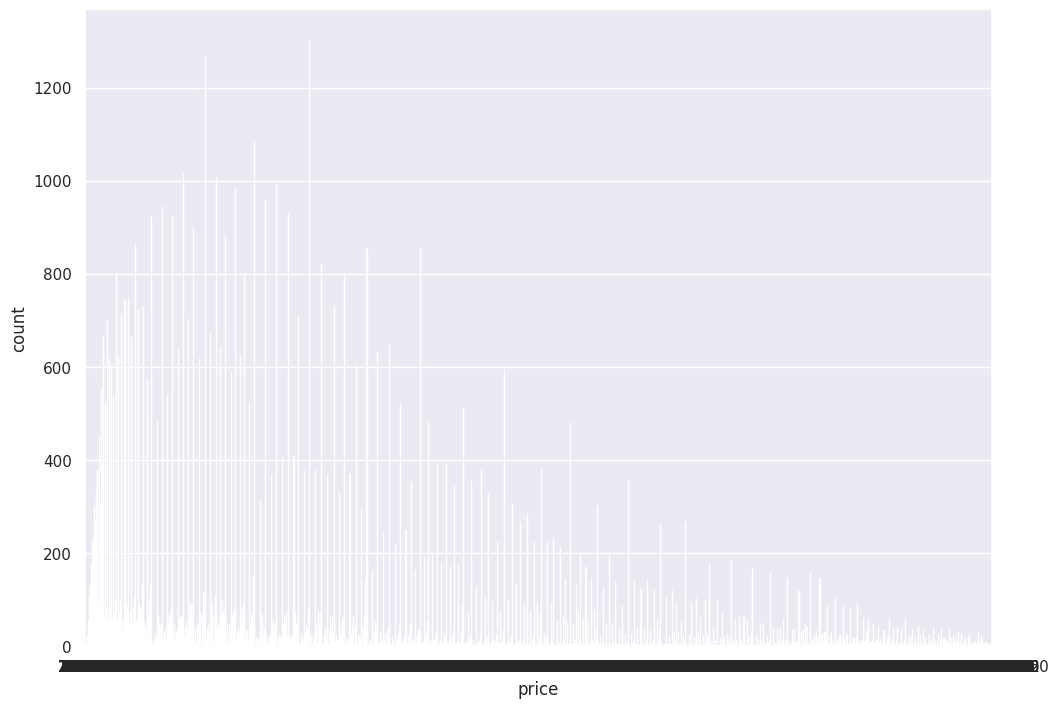

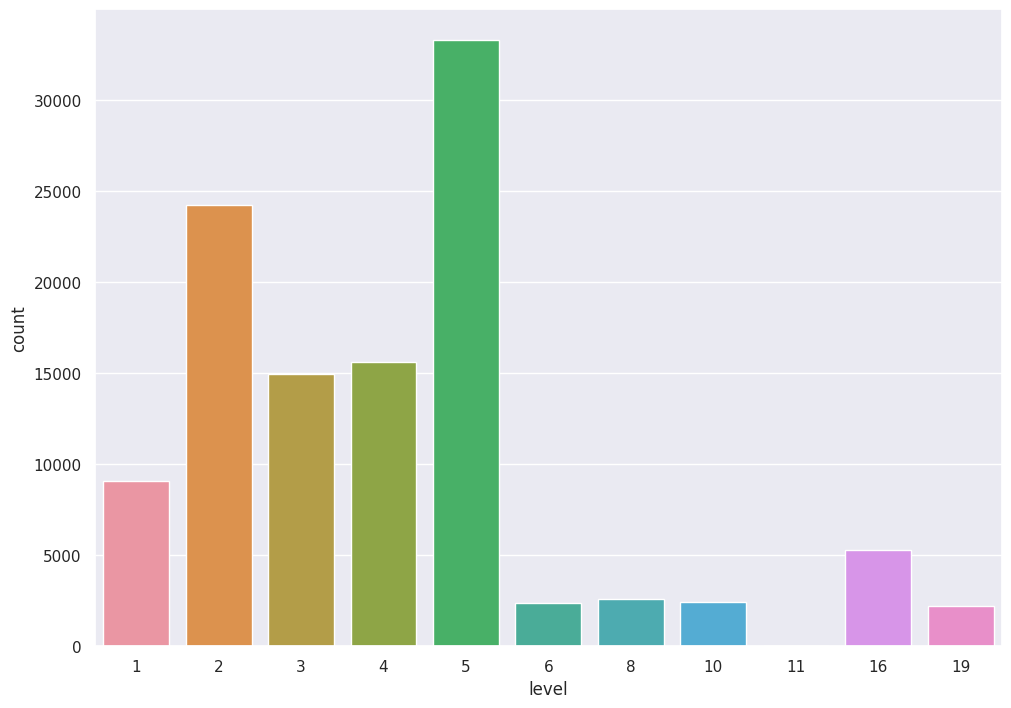

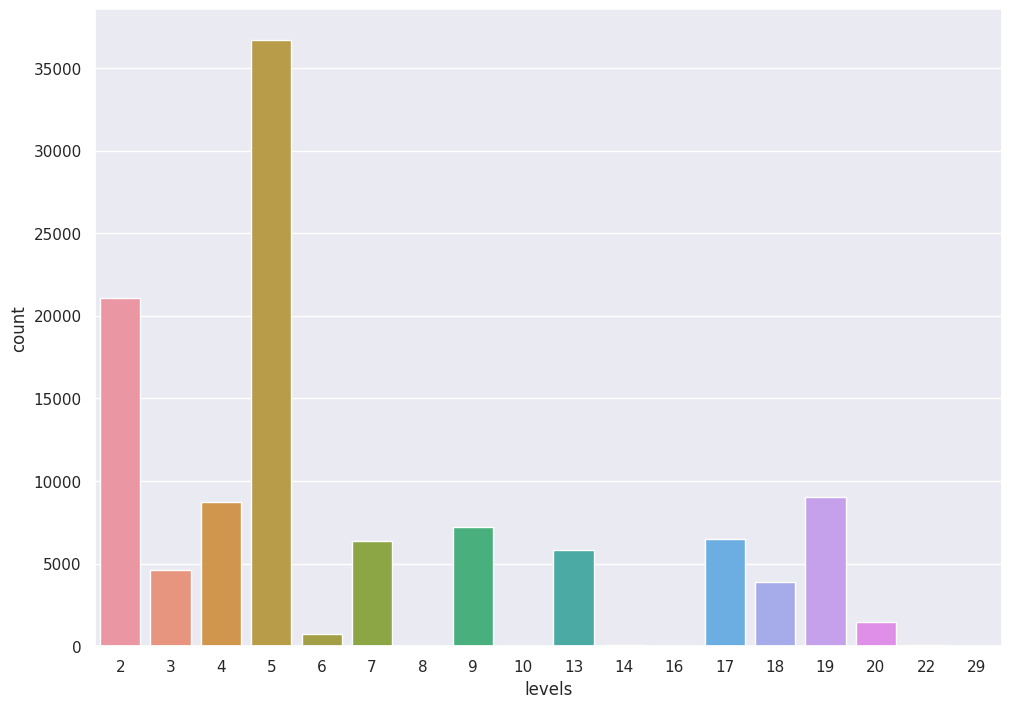

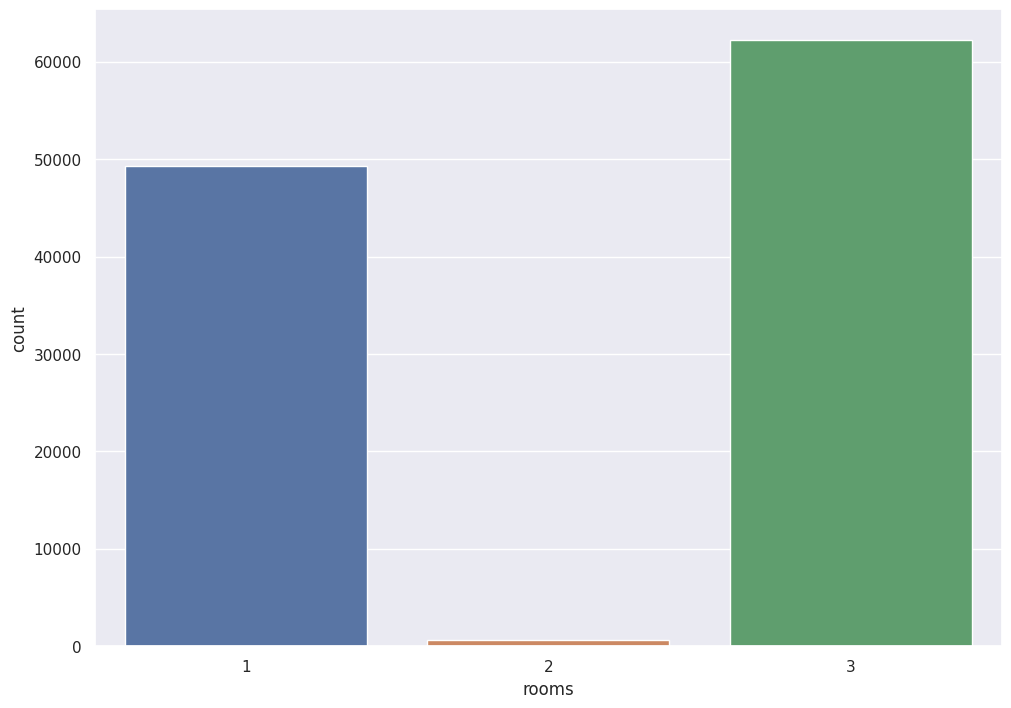

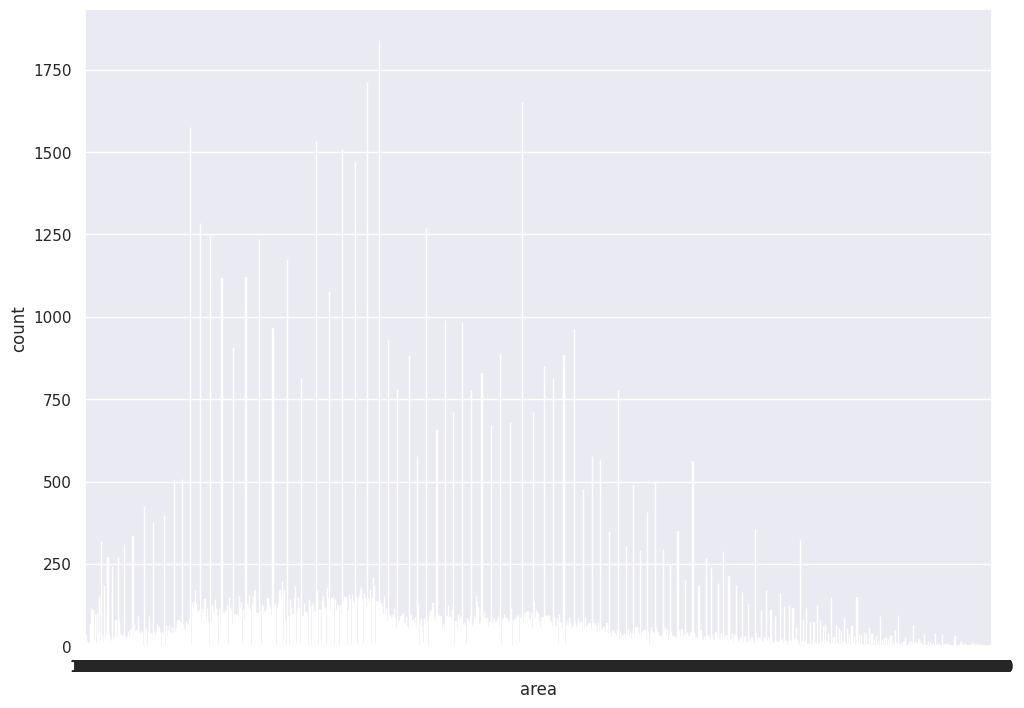

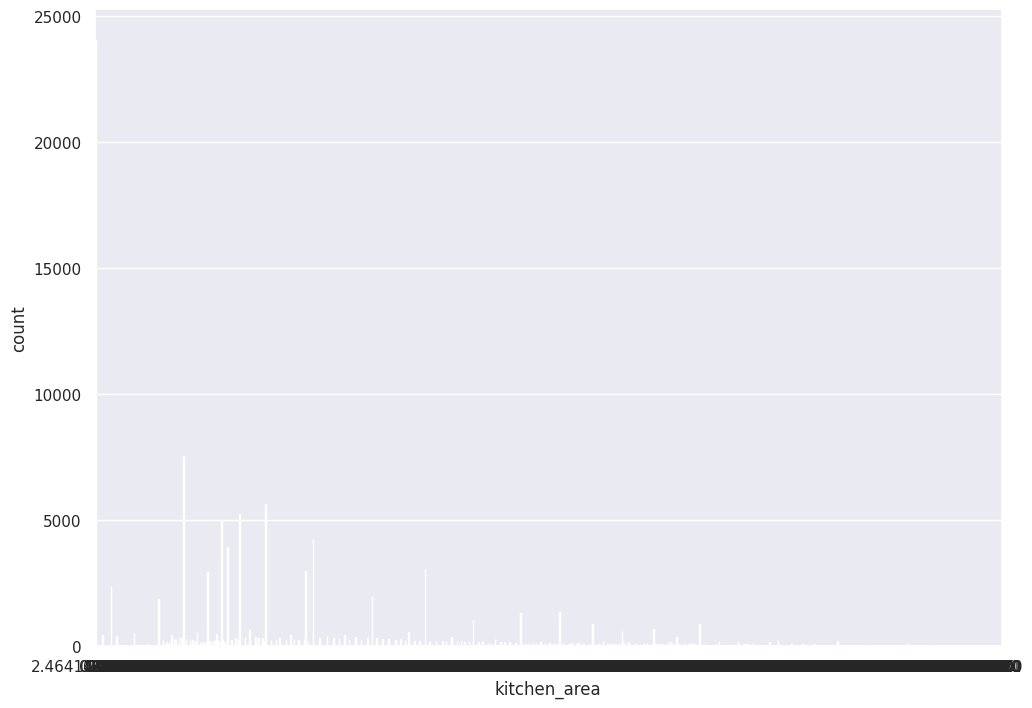

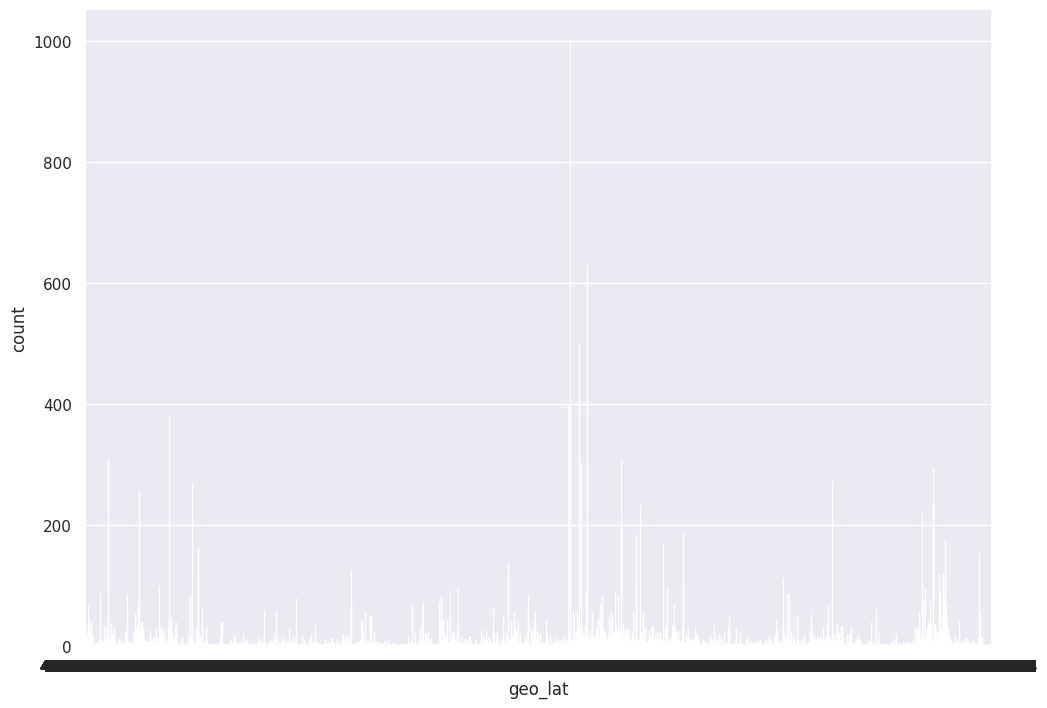

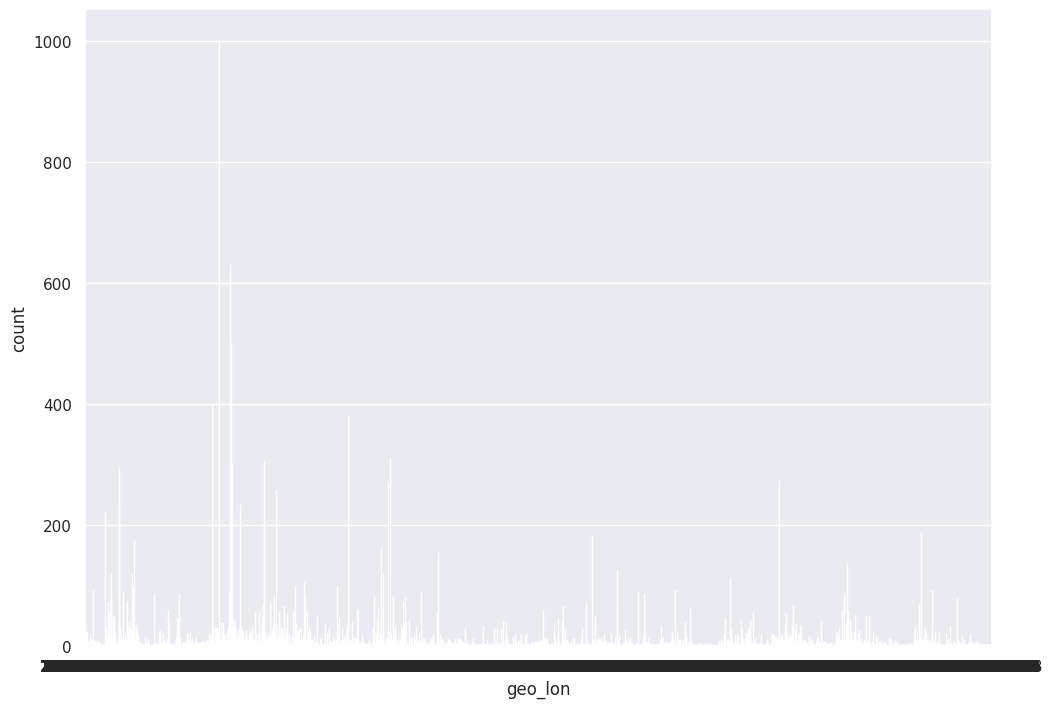

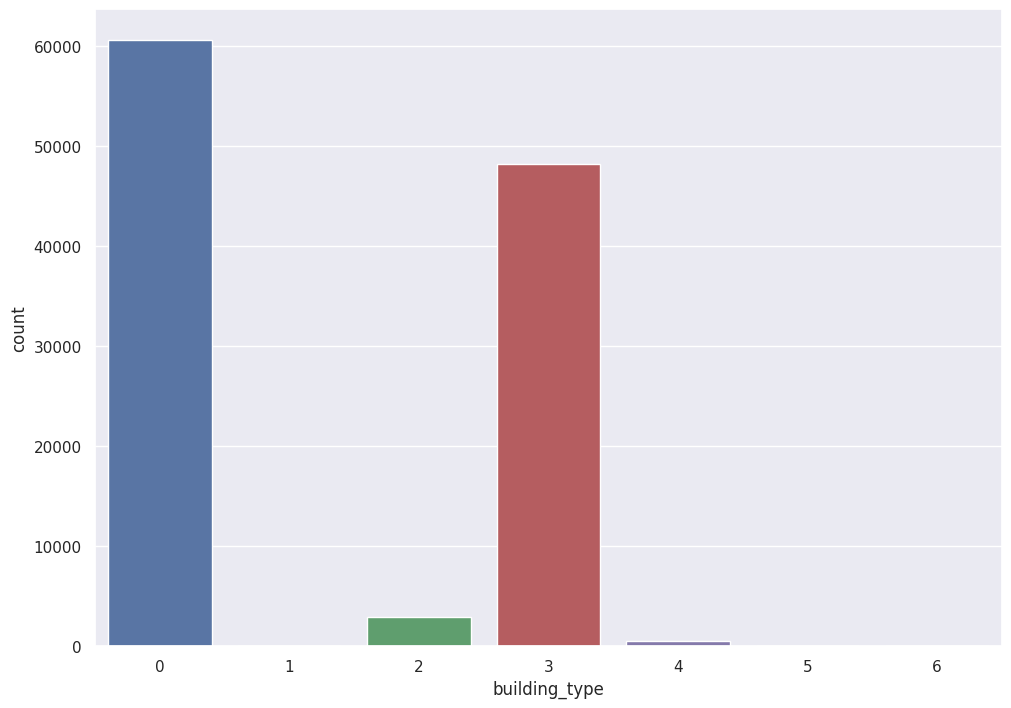

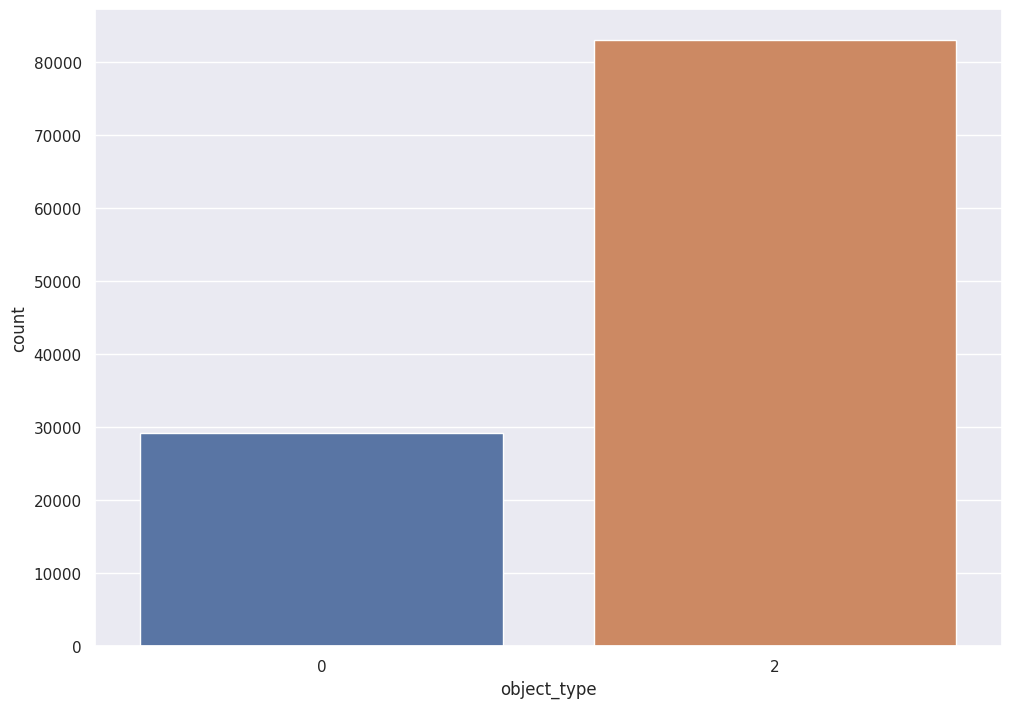

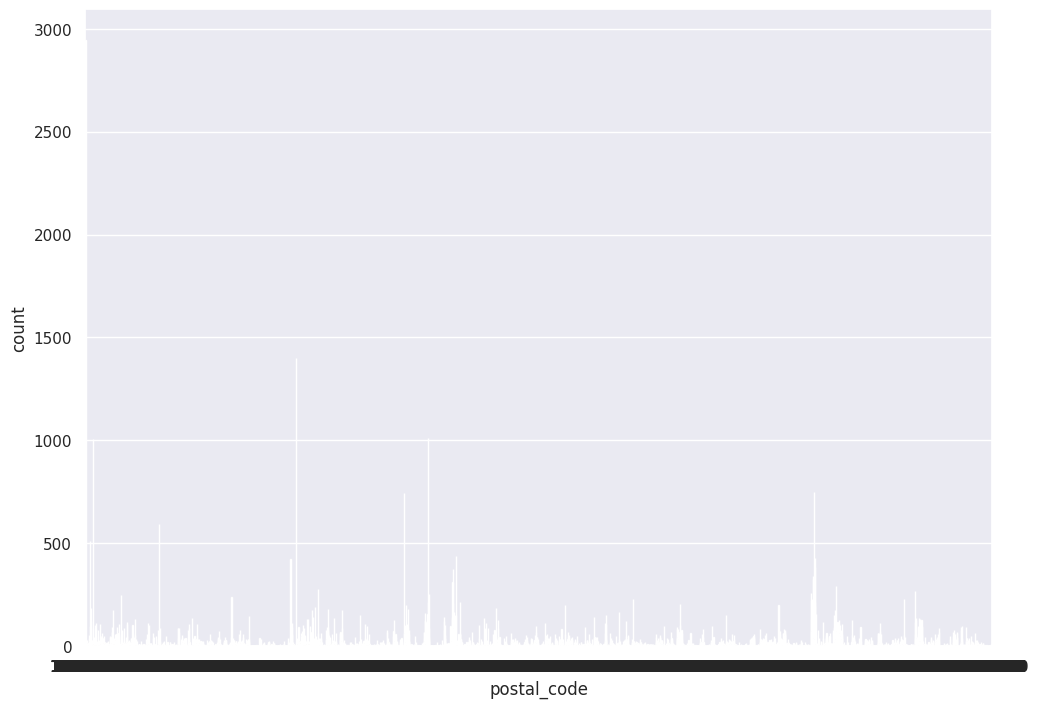

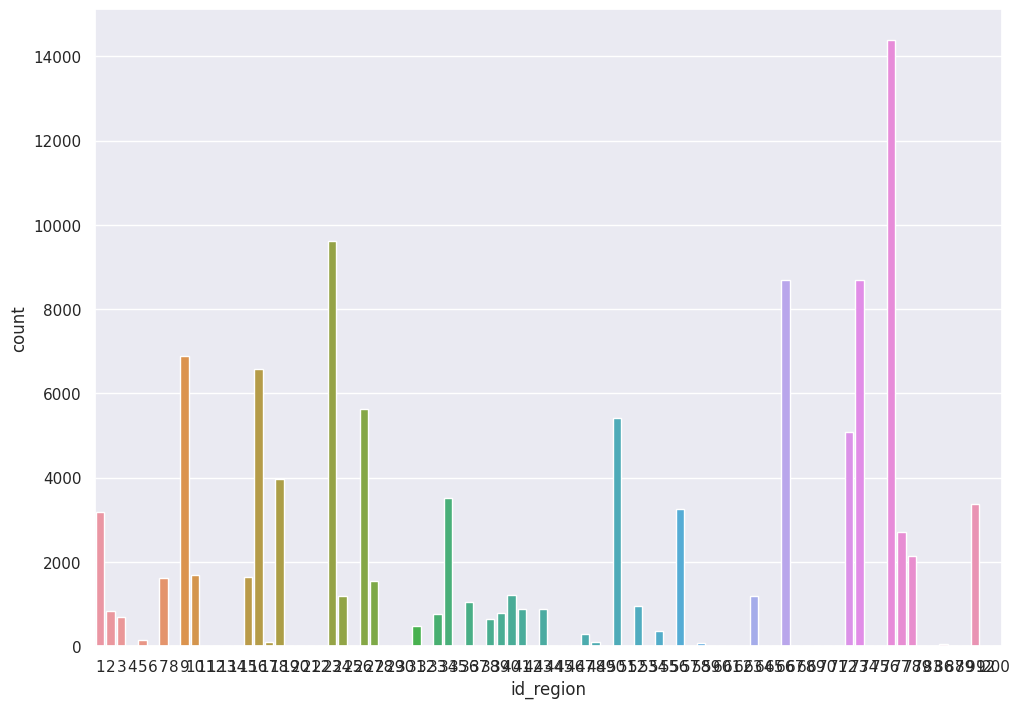

In [ ]:
for col in DF[[col for col in num_columns]]:
    sns.countplot(x=DF[col], data=DF[col]);
    plt.show()

Сильно коррелирующий признаков с целевой переменной "price" не обнаружено. Однако заметно коррелируют между собой level и levels (что очевидно), rooms и area (что тоже очевидно) и неменее заметно area и kitchen_area. Под вопросом условие отсутствия мультиколлинеарности между признаками.

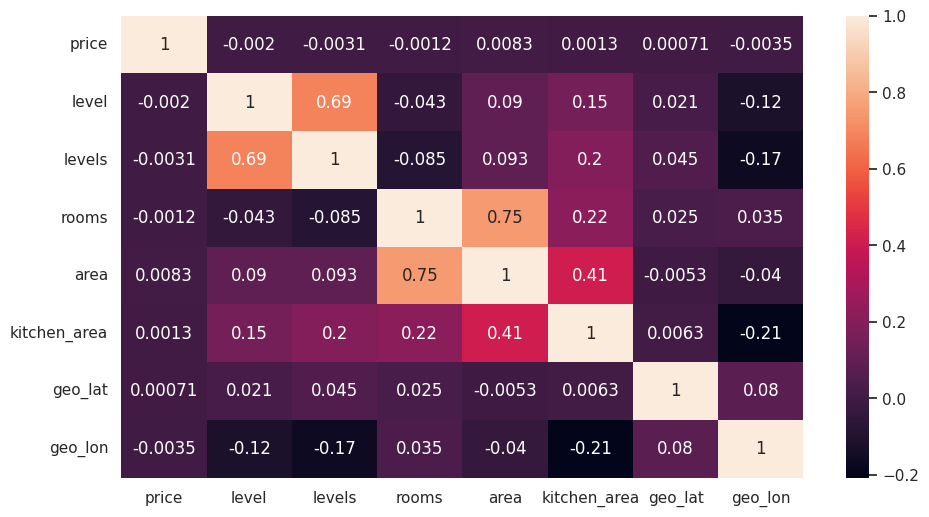

In [ ]:
corr_matrix = DF[num_columns].corr()
plt.figure(figsize=(11,6))
sns.heatmap(corr_matrix, annot=True)
plt.show()

### 1.3. Работа с выборосами

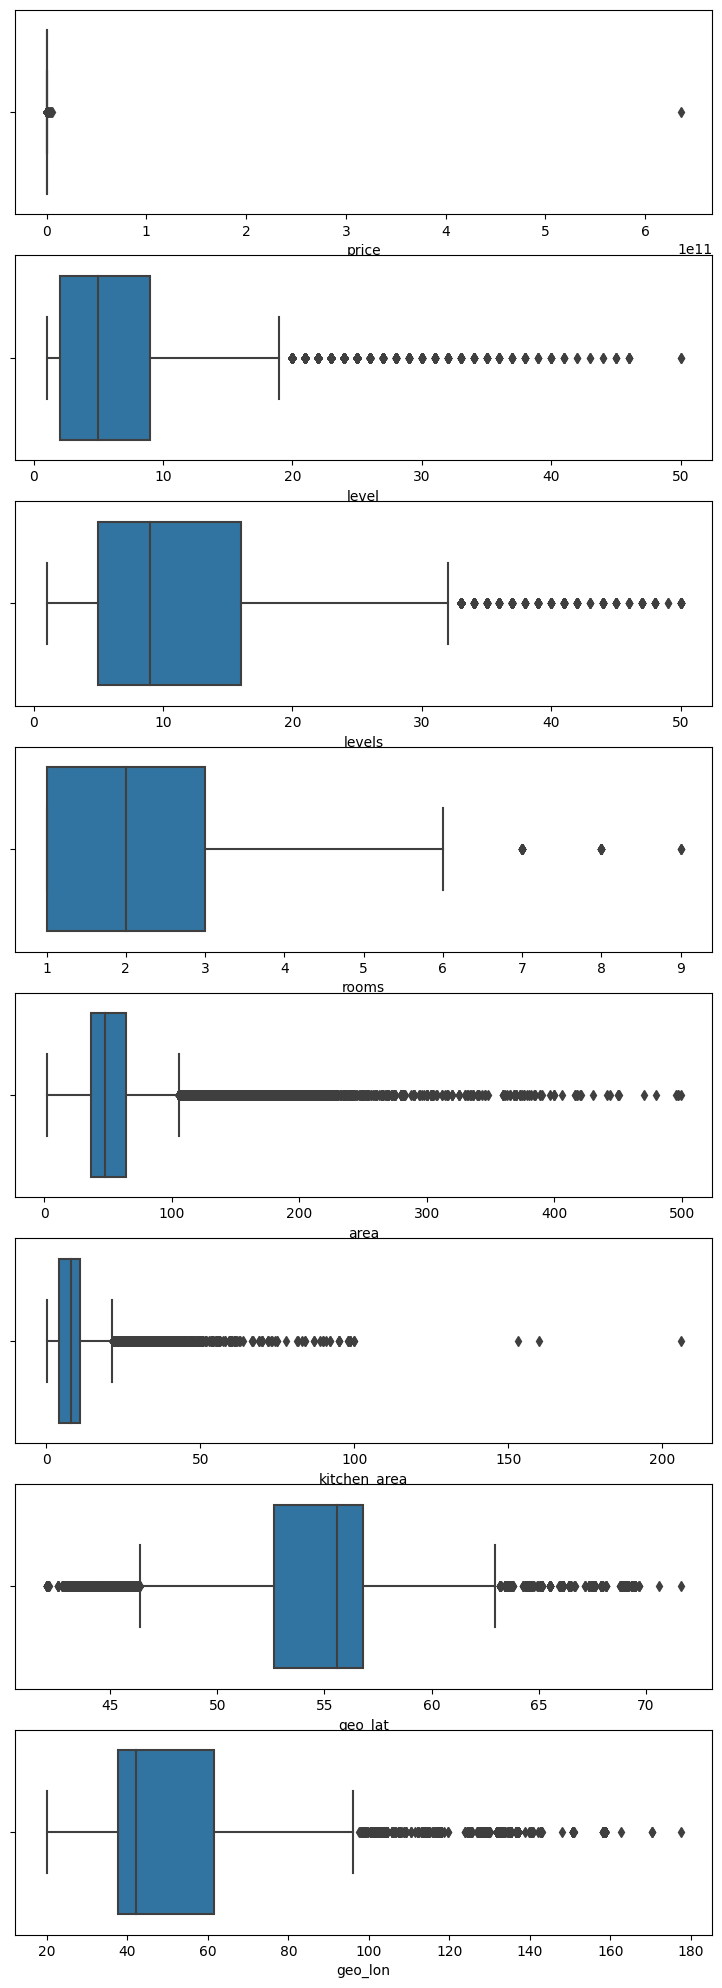

In [ ]:
fig, ax = plt.subplots(nrows=8, ncols=1, figsize=(9,25))

for idx, column_name in enumerate(num_columns):

    plt.subplot(8,1, idx+1)
    sns.boxplot(data=DF,
            x=column_name);

Только в случае с некоторыми экстремальными значениями в price и kitchen_area мы можем говорить о присутствии выбросов. Экстремальные значения в остальных признаках вполне могут быть реальными данными.

Для выбросов опробуем две стратегии: удаление и игнорирование

In [ ]:
def search_outliers(feature):
    """Функция принимает набор значений 1-го признака и
    возвращает массив индексов тех значений, которые являются выбросами"""
    q1, q3 = np.percentile(feature, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return np.where((feature < lower_bound) | (feature > upper_bound))[0]

In [ ]:
for feature in num_columns:
    sum_outliers = len(search_outliers(DF[feature]))
    print(f"Признак {feature} содержит {sum_outliers} выбросов из {DF[feature].shape[0]} наблюдений")

Признак price содержит 10331 выбросов из 112237 наблюдений
Признак level содержит 3569 выбросов из 112237 наблюдений
Признак levels содержит 1150 выбросов из 112237 наблюдений
Признак rooms содержит 39 выбросов из 112237 наблюдений
Признак area содержит 4743 выбросов из 112237 наблюдений
Признак kitchen_area содержит 3738 выбросов из 112237 наблюдений
Признак geo_lat содержит 14893 выбросов из 112237 наблюдений
Признак geo_lon содержит 4804 выбросов из 112237 наблюдений


### 1.4 Метод удаления выбросов

In [ ]:
def search_outliers_new(old_feature, new_feature):
    """Функция принимает набор значений 1-го признака каким он был до удаления выбросов,
    чтобы корректно расчитать границы выбросов
    И набор значений того же признака после удаления выбросов
    Возвращает массив индексов тех значений, которые являются выбросами"""
    q1, q3 = np.percentile(old_feature, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return np.where((new_feature < lower_bound) | (new_feature > upper_bound))[0]

In [ ]:
DF_del_outliers = DF.copy()
drop_index = np.array([])
print(DF_del_outliers.shape)
for feature in num_columns:
    drop_index = np.hstack((drop_index, search_outliers(DF_del_outliers[feature])))
DF_del_outliers.drop(drop_index, inplace=True)
print(DF_del_outliers.shape)

(112237, 13)
(78074, 13)


In [ ]:
for feature in num_columns:
    sum_outliers = len(search_outliers_new(DF[feature], DF_del_outliers[feature]))
    print(f"Признак {feature} содержит {sum_outliers} выбросов из {DF_del_outliers[feature].shape[0]} наблюдений")

Признак price содержит 0 выбросов из 78074 наблюдений
Признак level содержит 0 выбросов из 78074 наблюдений
Признак levels содержит 0 выбросов из 78074 наблюдений
Признак rooms содержит 0 выбросов из 78074 наблюдений
Признак area содержит 0 выбросов из 78074 наблюдений
Признак kitchen_area содержит 0 выбросов из 78074 наблюдений
Признак geo_lat содержит 0 выбросов из 78074 наблюдений
Признак geo_lon содержит 0 выбросов из 78074 наблюдений


### 1.5 Методы предварительной обработки данных

Чисто визуально кажется что числовые признаки распределены НЕ нормально, однако чтобы удостовериться проведем тест Колмагорова-Смирнова

In [ ]:
from scipy.stats import kstest

# для данных с выбросами
for feature in num_columns:
     statistic, pvalue = kstest(DF[feature], 'norm')
     print(feature, pvalue)

price 0.0
level 0.0
levels 0.0
rooms 0.0
area 0.0
kitchen_area 0.0
geo_lat 0.0
geo_lon 0.0


In [ ]:
# для данных без выбросов
for feature in num_columns:
     statistic, pvalue = kstest(DF_del_outliers[feature], 'norm')
     print(feature, pvalue)

price 0.0
level 0.0
levels 0.0
rooms 0.0
area 0.0
kitchen_area 0.0
geo_lat 0.0
geo_lon 0.0


Распределелние каждого признака значимо отличается от нормального

#### 1.5.1 Логарифмирование значений

In [ ]:
# для данных с выбросами
df_power  = DF_del_outliers.copy()
df_power[num_columns] = np.log(df_power[num_columns])

In [ ]:
df_power.head()

,date,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,postal_code,id_region
0,2021-01-01,14.7121,2.7090,3.4336,0.0000,3.4102,-2.3027,4.0392,4.1059,0,1,30176,66
2,2021-01-01,16.1858,1.3867,2.5645,1.0986,4.4414,2.4844,4.0171,3.6303,3,0,11629,50
5,2021-01-01,14.1871,1.6094,1.6094,0.6934,3.8496,1.7920,3.8818,3.7970,2,0,6880,34
9,2021-01-01,14.6441,0.6934,0.6934,0.6934,3.9746,2.7734,3.9734,3.8074,5,0,-18749,58
10,2021-01-01,15.0245,0.0000,2.9453,0.0000,2.3125,0.6934,4.0214,3.6254,3,0,-8065,77


In [ ]:
# для данных с выбросами
for feature in num_columns:
     statistic, pvalue = kstest(df_power[feature], 'norm')
     print(feature, pvalue)

price 0.0
level 0.0
levels 0.0
rooms 0.0
area 0.0
kitchen_area 0.0
geo_lat 0.0
geo_lon 0.0


Распределение значений признака и целевой переменной так и осталось НЕ нормальным.

#### 1.5.2 Версия без логорифмирования значений

Пробовать модели будем на версии данных без предобработки

In [ ]:
DF_for_split = DF_del_outliers.copy()

In [ ]:
DF_for_split

,date,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,postal_code,id_region
0,2021-01-01,2451300,15,31,1,30.2969,0.1000,56.7801,60.6994,0,1,30176,66
2,2021-01-01,10700000,4,13,3,85.0000,12.0000,55.5401,37.7251,3,0,11629,50
5,2021-01-01,1450000,5,5,2,47.0000,6.0000,48.5112,44.5668,2,0,6880,34
9,2021-01-01,2290000,2,2,2,53.1875,16.0000,53.1644,45.0340,5,0,-18749,58
10,2021-01-01,3350000,1,19,1,10.1016,2.0000,55.7780,37.5401,3,0,-8065,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112232,2021-01-11,3800000,6,19,3,62.0000,0.1000,56.5205,85.0517,4,0,-21297,70
112233,2021-01-11,3150000,3,17,2,57.4062,10.5000,57.5867,39.9009,2,1,18934,76
112234,2021-01-11,2000000,16,18,2,52.4062,0.1000,55.9834,92.8239,2,1,4652,24
112235,2021-01-11,4390000,2,7,1,56.0000,0.1000,56.5000,84.9489,0,0,-21351,70


In [ ]:
X,y = DF_for_split.drop(columns = ['object_type']),DF_for_split['object_type'].values

## 2. Выделение тренировочной и тестовой выборки

In [ ]:
from sklearn.impute import SimpleImputer # Объект для замены пропущенных значений

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler # Импортируем нормализацию и One-Hot Encoding от scki-kit-learn


from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer


from sklearn.model_selection import train_test_split #  функция разбиения на тренировочную и тестовую выборку
from sklearn.metrics import classification_report # функция scikit-learn которая считает много метрик классификации
from sklearn.model_selection import StratifiedKFold # при кросс-валидации разбиваем данные в пропорции целевой метки
from sklearn.model_selection import cross_validate # функция кросс-валидации

from sklearn.metrics import confusion_matrix # матрица ошибок
from sklearn.metrics import accuracy_score as acc # функция расчета доли правильных ответов
from sklearn.metrics import f1_score as f1 # функция расчета f1-меры

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy import stats

In [ ]:
df = DF_for_split.copy() # для работы с преобразованными данными (логарифмирование)

In [ ]:
X,y = df.drop(columns = ['object_type']),df['object_type'].values # отделяем целевой признак от основных данных

In [ ]:
column_transform = make_column_transformer(
    (OneHotEncoder(), cat_columns))

X_encoded = column_transform.fit_transform(X)

In [ ]:
X_encoded.shape

(78074, 6934)

In [ ]:
X_encoded

<78074x6934 sparse matrix of type '<class 'numpy.float64'>'
	with 312296 stored elements in Compressed Sparse Row format>

In [ ]:
# разбиваем на тестовую и тренировочную
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((62459, 6934), (15615, 6934))

В кач-ве основных метрик для оценки моделей классификации возьмем следующие:

In [ ]:
scoring = {'ACC': 'accuracy',
           'F1': 'f1',
           'Precision': 'precision',
           'Recall': 'recall'}

## 3. Моделирование

### 3.1 CatBoost

In [ ]:
X1,y1 = DF_for_split.drop(columns = ['object_type']),DF_for_split['object_type'].values

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [ ]:
X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape

((62459, 12), (15615, 12), (62459,), (15615,))

In [ ]:
features_names = list(DF_for_split.drop(columns = ['object_type']).columns)
features_names

['date',
 'price',
 'level',
 'levels',
 'rooms',
 'area',
 'kitchen_area',
 'geo_lat',
 'geo_lon',
 'building_type',
 'postal_code',
 'id_region']

In [ ]:
cat_columns

['date', 'building_type', 'postal_code', 'id_region']

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 10.1 MB/s eta 0:00:00


In [ ]:
from catboost import Pool
from catboost import CatBoostClassifier

In [ ]:
train_data = Pool(
    data=X_train1,
    label=y_train1,
    cat_features = cat_columns,
    feature_names=features_names
)

eval_data = Pool(
    data=X_test1,
    label=y_test1,
    cat_features = cat_columns,
    feature_names=features_names
)

In [ ]:
model = CatBoostClassifier(iterations = 1000,
                           early_stopping_rounds=100,
                           verbose = 100,
                           cat_features = cat_columns,
                           depth = 3,
                           eval_metric= 'BalancedAccuracy'
                           )


In [ ]:
model.fit(X=train_data,
          eval_set=eval_data,
          )

Learning rate set to 0.087988
0:	learn: 0.6911715	test: 0.6946858	best: 0.6946858 (0)	total: 112ms	remaining: 1m 51s
100:	learn: 0.8498920	test: 0.8830426	best: 0.8836351 (96)	total: 9.19s	remaining: 1m 21s
200:	learn: 0.8610661	test: 0.8870198	best: 0.8873295 (198)	total: 25.5s	remaining: 1m 41s
300:	learn: 0.8664505	test: 0.8911923	best: 0.8911923 (300)	total: 43.3s	remaining: 1m 40s
400:	learn: 0.8698727	test: 0.8932495	best: 0.8939456 (380)	total: 1m 5s	remaining: 1m 37s
500:	learn: 0.8732803	test: 0.8947216	best: 0.8951231 (492)	total: 1m 21s	remaining: 1m 20s
600:	learn: 0.8759672	test: 0.8966417	best: 0.8970086 (586)	total: 1m 29s	remaining: 59.5s
700:	learn: 0.8793979	test: 0.8994446	best: 0.8997544 (693)	total: 1m 35s	remaining: 40.8s
800:	learn: 0.8820492	test: 0.9014866	best: 0.9016205 (799)	total: 1m 42s	remaining: 25.4s
900:	learn: 0.8847970	test: 0.9028897	best: 0.9034099 (875)	total: 1m 47s	remaining: 11.8s
999:	learn: 0.8861941	test: 0.9040295	best: 0.9044234 (963)	tota

In [ ]:
y_predict1=model.predict(eval_data)

print (classification_report(y_test1, y_predict1, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     11879
           1       0.88      0.84      0.86      3736

    accuracy                           0.94     15615
   macro avg       0.92      0.90      0.91     15615
weighted avg       0.94      0.94      0.94     15615



В данном случае, модель имеет высокий precision и recall для класса 0 (первичное жильё), а для класса 1 (вторичка) - немного ниже. F1-score также для класса 0 выше, чем для класса 1. Возможно этот эффект связан с тем, что есть дисбаланс в объеме между классами: 11879 и 3736, соответственно.

In [ ]:
def cross_validation (X, y, model, scoring, cv_rule):
    scores = cross_validate(model,X, y,
                      scoring=scoring, cv=cv_rule )
    print('Ошибка на кросс-валидации')
    DF_poly = pd.DataFrame(scores)
    display(DF_poly)
    print('\n')
    print(DF_poly.mean()[2:])

In [ ]:
cross_validation (X_train1, y_train1,
                  model, scoring,
                  StratifiedKFold(n_splits=5, shuffle = True, random_state=42))

Learning rate set to 0.054736
0:	learn: 0.7564790	total: 55.4ms	remaining: 55.4s
100:	learn: 0.8392821	total: 4.4s	remaining: 39.2s
200:	learn: 0.8491345	total: 12.8s	remaining: 50.8s
300:	learn: 0.8549510	total: 21.3s	remaining: 49.4s
400:	learn: 0.8593022	total: 31.9s	remaining: 47.7s
500:	learn: 0.8618545	total: 43.5s	remaining: 43.3s
600:	learn: 0.8640499	total: 50.2s	remaining: 33.3s
700:	learn: 0.8658356	total: 56.4s	remaining: 24.1s
800:	learn: 0.8685063	total: 1m	remaining: 15.1s
900:	learn: 0.8706281	total: 1m 4s	remaining: 7.12s
999:	learn: 0.8724321	total: 1m 10s	remaining: 0us
Learning rate set to 0.054736
0:	learn: 0.7532280	total: 59.2ms	remaining: 59.1s
100:	learn: 0.8374569	total: 3.71s	remaining: 33s
200:	learn: 0.8472173	total: 7.66s	remaining: 30.4s
300:	learn: 0.8533461	total: 15.5s	remaining: 36s
400:	learn: 0.8579888	total: 20s	remaining: 29.9s
500:	learn: 0.8613973	total: 24s	remaining: 23.9s
600:	learn: 0.8647296	total: 29.5s	remaining: 19.6s
700:	learn: 0.86708

,fit_time,score_time,test_ACC,test_F1,test_Precision,test_Recall
0,71.4446,0.0869,0.9264,0.8416,0.8635,0.8208
1,48.9371,0.0872,0.9291,0.8455,0.8783,0.8151
2,48.9517,0.0804,0.9253,0.8381,0.8662,0.8118
3,49.1094,0.0890,0.9280,0.8440,0.8718,0.8179
4,46.4219,0.0779,0.9249,0.8348,0.8768,0.7966




test_ACC          0.9267
test_F1           0.8408
test_Precision    0.8713
test_Recall       0.8124
dtype: float64


На кросс-валидации модель показала себя несколько значительно хуже - метрики упали на 2-8%, возможно имеет место переобучение.

In [ ]:
results = model.evals_result_

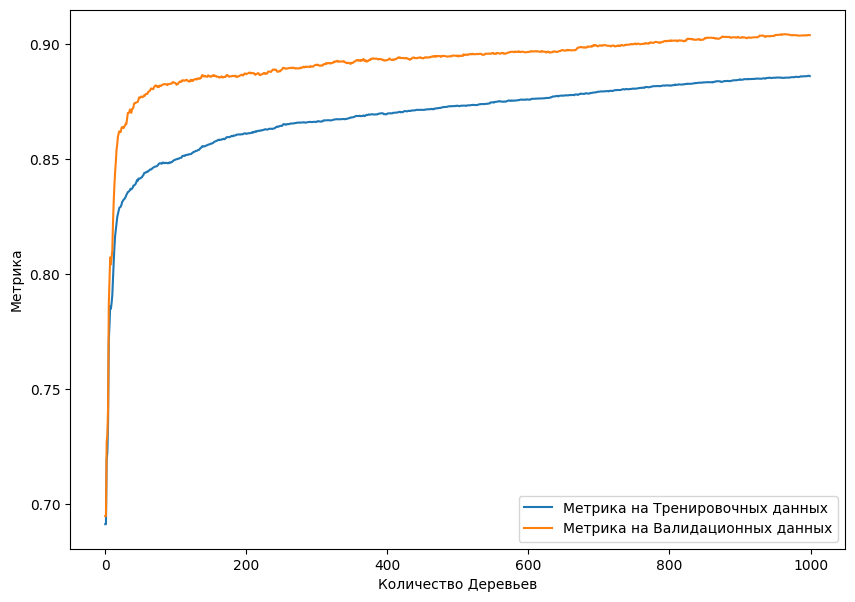

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(results["learn"]["BalancedAccuracy"], label="Метрика на Тренировочных данных")
plt.plot(results["validation"]["BalancedAccuracy"], label="Метрика на Валидационных данных")
plt.xlabel("Количество Деревьев")
plt.ylabel("Метрика")
plt.legend();

In [ ]:
metrics = model.eval_metrics(eval_data, metrics = ['AUC','Logloss','TotalF1']);

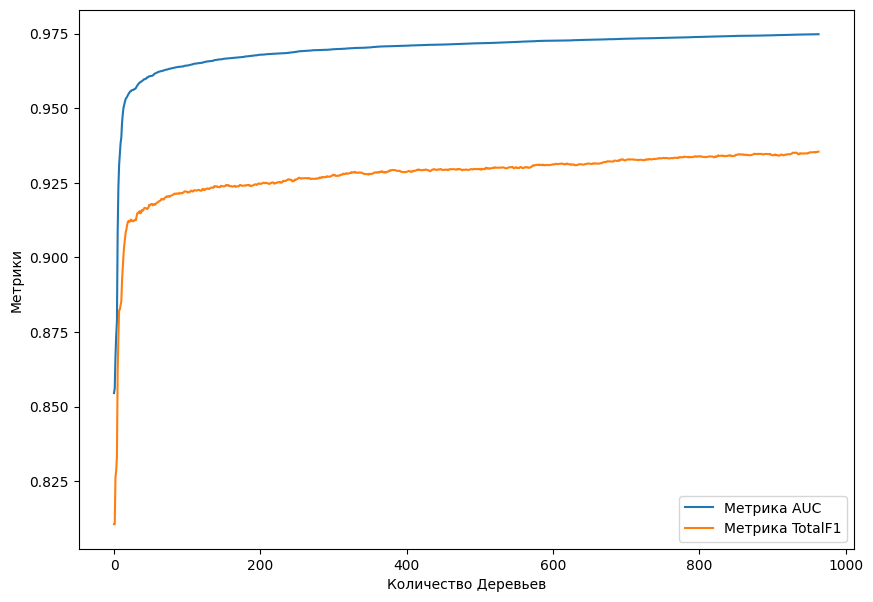

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(metrics["AUC"], label="Метрика AUC")
plt.plot(metrics["TotalF1"], label="Метрика TotalF1")
plt.xlabel("Количество Деревьев")
plt.ylabel("Метрики")
plt.legend();

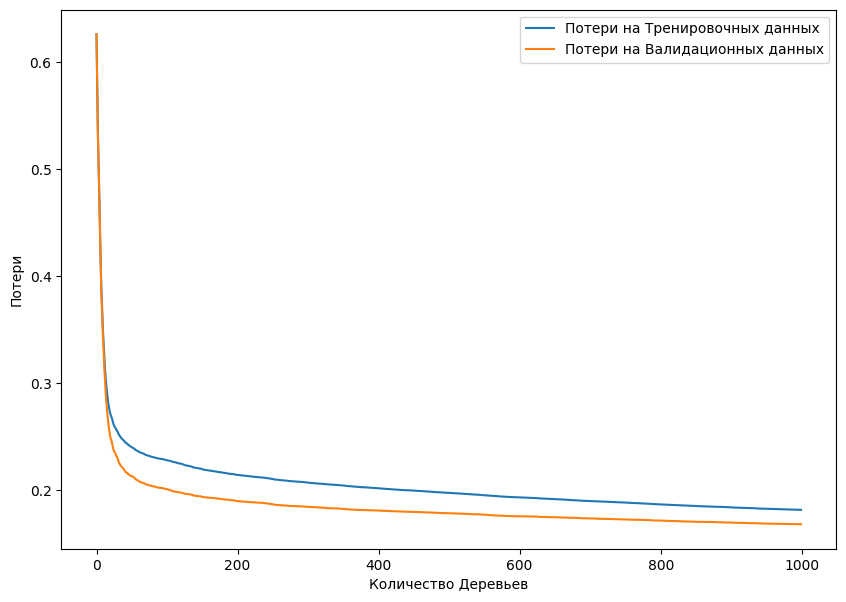

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(results["learn"]["Logloss"], label="Потери на Тренировочных данных")
plt.plot(results["validation"]["Logloss"], label="Потери на Валидационных данных")
plt.xlabel("Количество Деревьев")
plt.ylabel("Потери")
plt.legend();

Удивительно, но наша модель показывает овер-перформанс функции потерь на валидационных данных

In [ ]:
def feature_importance_plotter(model, features_names):
    # У CatBoost значимость признаков не нормированная
    feature_importance = model.feature_importances_/np.sum(model.feature_importances_)

    sorted = np.argsort(feature_importance)

    ypos = np.arange(len(features_names))

    fig= plt.figure(figsize=(8,4))
    plt.barh(ypos, feature_importance[sorted])
    plt.xlim([0,1])
    plt.ylabel('Параметры')
    plt.xlabel('Значимость')
    plt.yticks(ypos,features_names[sorted] );

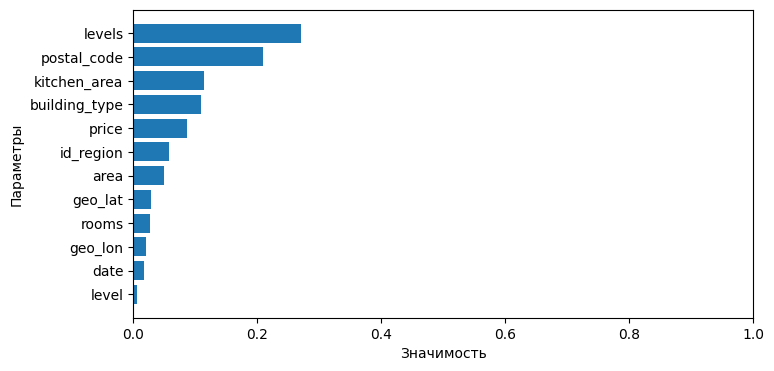

In [ ]:
feature_importance_plotter(model, np.array(features_names))

Внезапно postalcode дает большой прирост точности модели. Необычно видеть в топ-5 kitchen_area, а еще удивительней видеть низкую значимость признака level (этаж помещения)

In [ ]:
from random import randint
parameters = {'depth'         : [2,3,4,5,6,7,8,9, 10],
                 'learning_rate' : [0.01,0.02,0.03,0.04],
                  'iterations'    : [100, 500, 800, 1000, 1100, 1200]
                 }

Rand_CBC = RandomizedSearchCV(estimator=model, param_distributions = parameters, cv = 2, n_jobs=-1)

Rand_CBC.fit(X1,y1)

# Print the tuned parameters and score
print(Rand_CBC.best_params_)
print(Rand_CBC.best_score_)

0:	learn: 0.7616952	total: 112ms	remaining: 2m 14s
100:	learn: 0.8658652	total: 13.2s	remaining: 2m 23s
200:	learn: 0.8779559	total: 27.2s	remaining: 2m 15s
300:	learn: 0.8844906	total: 41.4s	remaining: 2m 3s
400:	learn: 0.8903119	total: 56.2s	remaining: 1m 51s
500:	learn: 0.8957029	total: 1m 11s	remaining: 1m 39s
600:	learn: 0.8995405	total: 1m 25s	remaining: 1m 25s
700:	learn: 0.9034402	total: 1m 40s	remaining: 1m 11s
800:	learn: 0.9066178	total: 1m 54s	remaining: 57.3s
900:	learn: 0.9095537	total: 2m 9s	remaining: 43s
1000:	learn: 0.9127932	total: 2m 24s	remaining: 28.6s
1100:	learn: 0.9159120	total: 2m 38s	remaining: 14.3s
1199:	learn: 0.9182197	total: 2m 54s	remaining: 0us
{'learning_rate': 0.04, 'iterations': 1200, 'depth': 7}
0.908061582601122


In [ ]:
cross_validation (X_train1, y_train1,
                  Rand_CBC, scoring,
                  StratifiedKFold(n_splits=5, shuffle = True, random_state=42))

0:	learn: 0.7677383	total: 94.9ms	remaining: 1m 34s
100:	learn: 0.8591744	total: 11.2s	remaining: 1m 39s
200:	learn: 0.8744652	total: 22.6s	remaining: 1m 29s
300:	learn: 0.8843783	total: 33.2s	remaining: 1m 17s
400:	learn: 0.8929312	total: 44s	remaining: 1m 5s
500:	learn: 0.9002289	total: 56.4s	remaining: 56.2s
600:	learn: 0.9068045	total: 1m 8s	remaining: 45.4s
700:	learn: 0.9132382	total: 1m 20s	remaining: 34.4s
800:	learn: 0.9188893	total: 1m 31s	remaining: 22.8s
900:	learn: 0.9229230	total: 1m 42s	remaining: 11.3s
999:	learn: 0.9280936	total: 1m 55s	remaining: 0us
0:	learn: 0.7246866	total: 81.2ms	remaining: 1m 37s
100:	learn: 0.8357903	total: 8.25s	remaining: 1m 29s
200:	learn: 0.8525804	total: 16.1s	remaining: 1m 19s
300:	learn: 0.8605186	total: 25.4s	remaining: 1m 15s
400:	learn: 0.8666869	total: 33.9s	remaining: 1m 7s
500:	learn: 0.8713033	total: 42.8s	remaining: 59.7s
600:	learn: 0.8758515	total: 52.5s	remaining: 52.3s
700:	learn: 0.8799822	total: 1m 1s	remaining: 44s
800:	lea

,fit_time,score_time,test_ACC,test_F1,test_Precision,test_Recall
0,1399.8950,0.2661,0.9354,0.8609,0.8836,0.8393
1,920.1963,0.2285,0.9353,0.8594,0.8907,0.8303
2,922.7504,0.2219,0.9318,0.8527,0.8779,0.8289
3,977.8779,0.2338,0.9348,0.8593,0.8847,0.8353
4,612.8044,0.1793,0.9315,0.8497,0.8894,0.8134




test_ACC          0.9338
test_F1           0.8564
test_Precision    0.8853
test_Recall       0.8295
dtype: float64


Catboost при оптимальном наборе гиперпараметров показывает неплохие метрики, однако для сравнения следует опробовать еще одну модель

### 3.2 XGboost Classfication

In [ ]:
import xgboost as xg

In [ ]:
modelxg = xg.XGBClassifier(random_state = 42,
                         learning_rate=0.01,
                           n_estimators = 500
                         )
modelxg.fit(X_train,y_train,
          eval_set=[(X_train, y_train), (X_test, y_test)],
        )

y_predict=modelxg.predict(X_test)

[0]	validation_0-logloss:0.68826	validation_1-logloss:0.68828
[1]	validation_0-logloss:0.68348	validation_1-logloss:0.68351
[2]	validation_0-logloss:0.67879	validation_1-logloss:0.67884
[3]	validation_0-logloss:0.67419	validation_1-logloss:0.67425
[4]	validation_0-logloss:0.66968	validation_1-logloss:0.66976
[5]	validation_0-logloss:0.66525	validation_1-logloss:0.66534
[6]	validation_0-logloss:0.66091	validation_1-logloss:0.66101
[7]	validation_0-logloss:0.65666	validation_1-logloss:0.65677
[8]	validation_0-logloss:0.65248	validation_1-logloss:0.65260
[9]	validation_0-logloss:0.64839	validation_1-logloss:0.64851
[10]	validation_0-logloss:0.64425	validation_1-logloss:0.64438
[11]	validation_0-logloss:0.64019	validation_1-logloss:0.64034
[12]	validation_0-logloss:0.63621	validation_1-logloss:0.63636
[13]	validation_0-logloss:0.63230	validation_1-logloss:0.63247
[14]	validation_0-logloss:0.62847	validation_1-logloss:0.62864
[15]	validation_0-logloss:0.62470	validation_1-logloss:0.62488
[1

У xgboost сильная просадка по метрикам в сравнении с Catboost:  
F1- 0.58  
Recall - 0.43  
у catboost даже без подбора гиперпараметров F1 - 0.83, Recall - 0.81

In [ ]:
cross_validation (X_train, y_train,
                  modelxg, scoring,
                  StratifiedKFold(n_splits=5, shuffle = True, random_state=42))

Ошибка на кросс-валидации


,fit_time,score_time,test_ACC,test_F1,test_Precision,test_Recall
0,12.1033,0.3040,0.8537,0.5875,0.8948,0.4373
1,9.8155,0.1715,0.8501,0.5699,0.9005,0.4168
2,21.0298,0.1959,0.8544,0.5908,0.8932,0.4413
3,12.4793,0.1752,0.8532,0.5854,0.8943,0.4351
4,33.5884,0.1817,0.8496,0.5697,0.8937,0.4182




test_ACC          0.8522
test_F1           0.5807
test_Precision    0.8953
test_Recall       0.4298
dtype: float64


In [ ]:
print(classification_report(y_test, y_predict, target_names=['First','Second']))

              precision    recall  f1-score   support

       First       0.85      0.98      0.91     11879
      Second       0.90      0.43      0.58      3736

    accuracy                           0.85     15615
   macro avg       0.87      0.71      0.75     15615
weighted avg       0.86      0.85      0.83     15615



In [ ]:
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1],
    'random_state': [42]

}

xgboost_rand_search = RandomizedSearchCV(estimator = modelxg, param_distributions = params, cv = 10, verbose=2, n_jobs = 4)
xgboost_rand_search.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py", line 1490, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 620, in inner_f
  

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rat...
                                           monotone_constraints=None,
                                           n_estimators=500, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=42, ...),
                   n_jobs=4,
                   param_distributions={'base_score': [0.2, 0.5, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'gamma': [0, 0.5, 1],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'n_estimators': [100, 200, 500],
                                        'random_state': [42],
                                        'reg_alpha': [0, 0.5, 1],
                                        'reg_lambda': [0.5, 1, 5]},
                   verbose=2)

In [ ]:
xg_best = xgboost_rand_search.best_estimator_

In [ ]:
xg_best.fit(X_train,y_train,
          eval_set=[(X_train, y_train), (X_test, y_test)],
        )

y_predict=xg_best.predict(X_test)

[0]	validation_0-logloss:0.64652	validation_1-logloss:0.64668
[1]	validation_0-logloss:0.60737	validation_1-logloss:0.60759
[2]	validation_0-logloss:0.57502	validation_1-logloss:0.57522
[3]	validation_0-logloss:0.54797	validation_1-logloss:0.54821
[4]	validation_0-logloss:0.52643	validation_1-logloss:0.52673
[5]	validation_0-logloss:0.50790	validation_1-logloss:0.50812
[6]	validation_0-logloss:0.49215	validation_1-logloss:0.49240
[7]	validation_0-logloss:0.47890	validation_1-logloss:0.47894
[8]	validation_0-logloss:0.46798	validation_1-logloss:0.46800
[9]	validation_0-logloss:0.45768	validation_1-logloss:0.45772
[10]	validation_0-logloss:0.44788	validation_1-logloss:0.44777
[11]	validation_0-logloss:0.43892	validation_1-logloss:0.43869
[12]	validation_0-logloss:0.43127	validation_1-logloss:0.43109
[13]	validation_0-logloss:0.42452	validation_1-logloss:0.42422
[14]	validation_0-logloss:0.41778	validation_1-logloss:0.41719
[15]	validation_0-logloss:0.41300	validation_1-logloss:0.41225
[1

In [ ]:
cross_validation (X_train, y_train,
                  xg_best, scoring,
                  StratifiedKFold(n_splits=5, shuffle = True, random_state=42))

Ошибка на кросс-валидации


,fit_time,score_time,test_ACC,test_F1,test_Precision,test_Recall
0,10.5009,0.1677,0.8838,0.7084,0.8798,0.5929
1,10.1813,0.1767,0.8792,0.6924,0.8798,0.5708
2,10.2963,0.1782,0.8884,0.7220,0.8877,0.6084
3,8.0208,0.1766,0.8843,0.7099,0.8818,0.5941
4,10.2820,0.1855,0.8839,0.7077,0.8841,0.5899




test_ACC          0.8839
test_F1           0.7081
test_Precision    0.8826
test_Recall       0.5912
dtype: float64


С помощью подбора оптимальных гиперпараметров удалось поднять метрику F1 и Recall, но до показателей catboost далеко.  
Возможно catboost умеет лучше работать с дисблансом в классах (количественном)

In [ ]:
print(classification_report(y_test, y_predict, target_names=['First','Second']))

              precision    recall  f1-score   support

       First       0.89      0.98      0.93     11879
      Second       0.89      0.60      0.72      3736

    accuracy                           0.89     15615
   macro avg       0.89      0.79      0.83     15615
weighted avg       0.89      0.89      0.88     15615

